In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import xlrd

DATA_FILE = './data/fire_theft.xls'

In [2]:
# Step 1: read in data from the .xls file
# book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
# sheet = book.sheet_by_index(0)
# data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
# n_samples = sheet.nrows - 1

import pandas as pd
data_pd = pd.read_excel(DATA_FILE)
data_pd.T

*** No CODEPAGE record, no encoding_override: will use 'ascii'


0     1     2     3     4     5     6     7     8     9   ...     32  \
X   6.2   9.5  10.5   7.7   8.6  34.1  11.0   6.9   7.3  15.1  ...    5.0   
Y  29.0  44.0  36.0  37.0  53.0  68.0  75.0  18.0  31.0  25.0  ...   32.0   

     33    34    35    36    37    38    39    40    41  
X  28.6  17.4  11.3   3.4  11.9  10.5  10.7  10.8   4.8  
Y  27.0  32.0  34.0  17.0  46.0  42.0  43.0  34.0  19.0  

[2 rows x 42 columns]

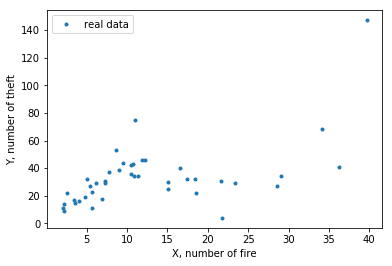

In [3]:
data = data_pd.as_matrix()
n_samples,_ = data.shape
data_x, data_y = data.T[0], data.T[1]
plt.plot(data_x, data_y, '.', label='real data')
plt.xlabel('X, number of fire')
plt.ylabel('Y, number of theft')
plt.legend()
plt.show()

## Huber loss
   *Robust to outliers.*
   If the difference between the predicted value and the real value is small, square it.
   If it's large, take its absolute value
\begin{equation*}
L_\delta(y,f(x)) = 
\begin{cases}
    \frac{1}{2}(y-f(x))^2 & \text{for } |y-f(x)| \leq \delta,   \\
    \delta |y-f(x)|-\frac{1}{2}\delta^2 & \text{otherwise} 
\end{cases}
\end{equation*}

In [4]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
w = tf.Variable(0.0)
b = tf.Variable(0.0)
Y_pred = X * w + b
loss = tf.square(Y_pred - Y)
loss_hb = huber_loss(Y, Y_pred)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
optimizer_hb = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss_hb)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        print('#Epoch {0}: loss = {1}'.format(i, total_loss/n_samples) )
    w_result, b_result = sess.run([w, b])

with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    for i in range(100):
        total_loss = 0
        for x, y in data:
            _, l = sess2.run([optimizer_hb, loss_hb], feed_dict={X: x, Y: y})
            total_loss += l
        print('#Epoch {0}: huber_loss = {1}'.format(i, total_loss/n_samples) )
    w_result_hb, b_result_hb = sess2.run([w, b])


#Epoch 0: loss = 2069.6319333978354
#Epoch 1: loss = 2117.0123581953535
#Epoch 2: loss = 2092.302723001866
#Epoch 3: loss = 2068.5080461938464
#Epoch 4: loss = 2045.591184088162
#Epoch 5: loss = 2023.5146448101316
#Epoch 6: loss = 2002.2447619835536
#Epoch 7: loss = 1981.748338803649
#Epoch 8: loss = 1961.9944411260742
#Epoch 9: loss = 1942.9520116143283
#Epoch 10: loss = 1924.5930823644712
#Epoch 11: loss = 1906.8898800636332
#Epoch 12: loss = 1889.8164505837929
#Epoch 13: loss = 1873.347133841543
#Epoch 14: loss = 1857.4588400604468
#Epoch 15: loss = 1842.1278742424079
#Epoch 16: loss = 1827.332495119955
#Epoch 17: loss = 1813.0520579712022
#Epoch 18: loss = 1799.2660847636982
#Epoch 19: loss = 1785.9562132299961
#Epoch 20: loss = 1773.1024853109072
#Epoch 21: loss = 1760.689129482884
#Epoch 22: loss = 1748.6984157081515
#Epoch 23: loss = 1737.1138680398553
#Epoch 24: loss = 1725.920873066732
#Epoch 25: loss = 1715.1046249579008
#Epoch 26: loss = 1704.6500954309377
#Epoch 27: loss = 

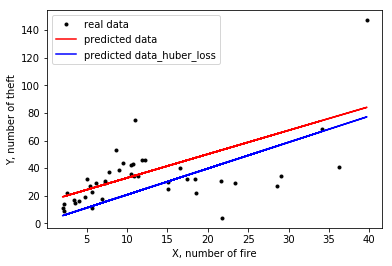

In [6]:
plt.plot(data_x, data_y, 'k.', label='real data')
plt.plot(data_x, (data_x * w_result + b_result), 'r', label='predicted data')
plt.plot(data_x, (data_x * w_result_hb + b_result_hb), 'b', label='predicted data_huber_loss')
plt.xlabel('X, number of fire')
plt.ylabel('Y, number of theft')
plt.legend()
plt.show()